In [1]:
# Load data

import os
import glob
import h5py
import json
import numpy as np
import datetime
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib
# matplotlib.use('TkAgg')  # Set the interactive backend
import matplotlib.pyplot as plt


In [2]:
file_path = r"/Volumes/MBQD_data/AION/Data/2024/12/12/nb_BB2amp0p5_nbam0p5to0p25_B30to30_tofIII"

# Get a list of all HDF5 files in the directory
h5_files = glob.glob(os.path.join(file_path, '*.h5'))

h5_files
print(len(h5_files))

11


In [3]:
horizontal_camera_redMOT_image_list = []
horizontal_camera_blueMOT_image_list = []
time_of_flight_list = []

for file_path in h5_files:
    with h5py.File(file_path, 'r') as h5file:
        time_of_flight = json.loads(h5file['parameters'][()])["sequence_parameters"]["time_of_flight"]
        horizontal_camera_redMOT_image = h5file['horizontal camera red mot'][:]
        horizontal_camera_blueMOT_iamge = h5file['horizontal camera blue mot'][:]
    if np.sum(horizontal_camera_redMOT_image) > 1e5:
        horizontal_camera_redMOT_image_list.append(horizontal_camera_redMOT_image)
        horizontal_camera_blueMOT_image_list.append(horizontal_camera_blueMOT_iamge)
        time_of_flight_list.append(time_of_flight)

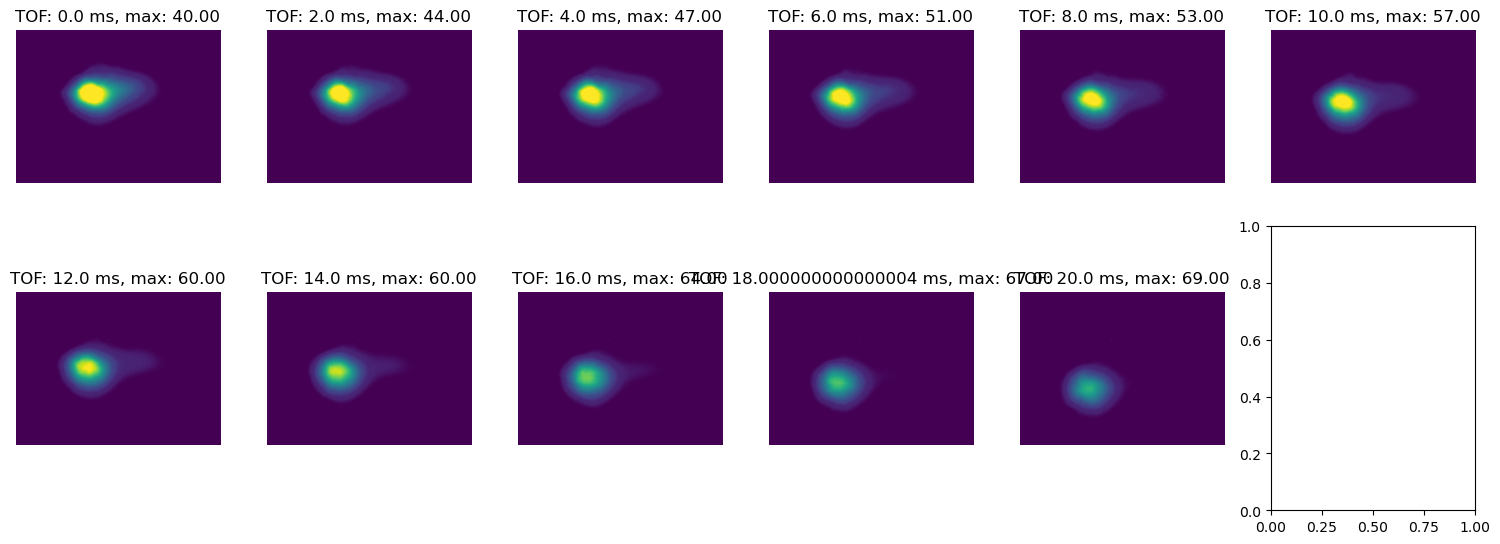

In [4]:
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

for i, ax in enumerate(axes.flatten()):
    if i < len(horizontal_camera_redMOT_image_list):
        ax.imshow(horizontal_camera_redMOT_image_list[i],vmin=0,vmax=10,origin='lower')
        ax.set_title(f'TOF: {time_of_flight_list[i]*1000} ms, max: {np.max(horizontal_camera_redMOT_image_list[i]):.2f}')
        ax.axis('off')

plt.tight_layout()
plt.show()

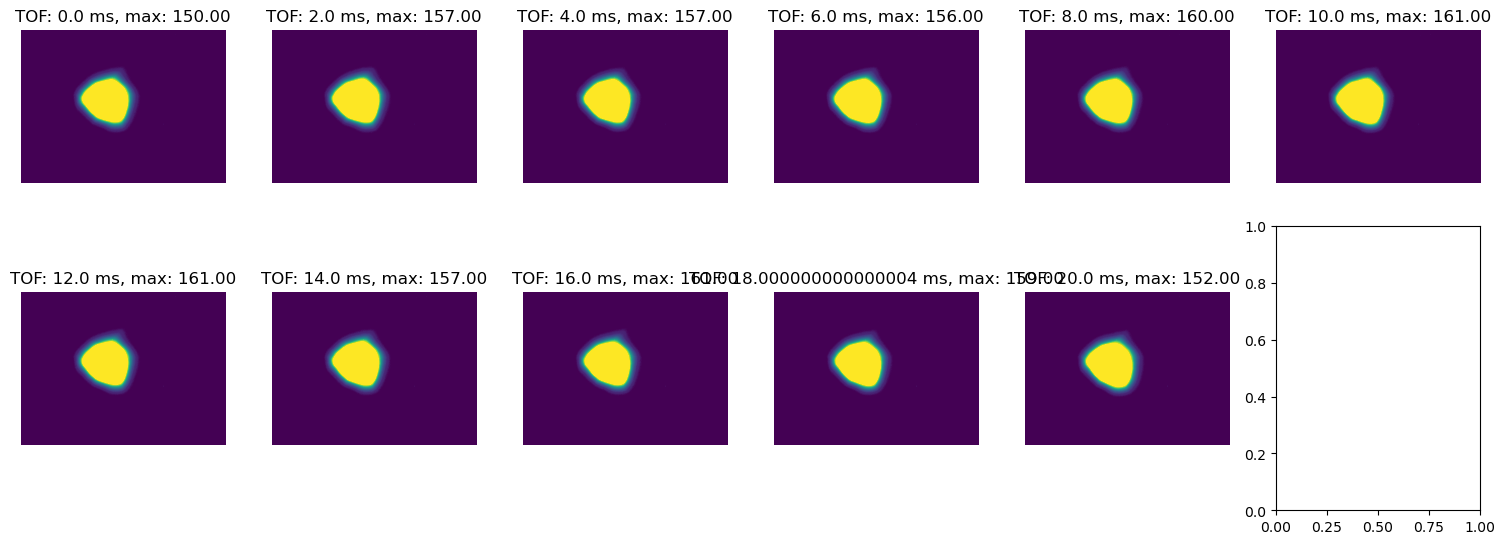

In [5]:
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

for i, ax in enumerate(axes.flatten()):
    if i < len(horizontal_camera_blueMOT_image_list):
        ax.imshow(horizontal_camera_blueMOT_image_list[i],vmin=0,vmax=10,origin='lower')
        ax.set_title(f'TOF: {time_of_flight_list[i]*1000} ms, max: {np.max(horizontal_camera_blueMOT_image_list[i]):.2f}')
        ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
ratios = np.array([
    np.sum(red_image) / np.sum(blue_image)
    for red_image, blue_image in zip(horizontal_camera_redMOT_image_list, horizontal_camera_blueMOT_image_list)
])

print(ratios)

[0.18098363 0.14215089 0.14842028 0.13896993 0.12938435 0.12568164
 0.11359057 0.10382636 0.09321377 0.08053276 0.07034037]


In [9]:
np.average(ratios), np.std(ratios)
print("The transfer efficiency is ", np.average(ratios)*100, "+-", np.std(ratios)*100)

The transfer efficiency is  12.064495894719549 +- 3.094998599376907
